# Discrete-time Hamiltonian matrix

The necessary conditions of optimality can be expressed (provided $\mathbf A$ is nonsinular) to 

\begin{equation}
\begin{bmatrix}
 \mathbf x_{k}\\\boldsymbol\lambda_k
\end{bmatrix}
=\underbrace{
\begin{bmatrix}
 \mathbf A^{-1} & \mathbf A^{-1}\mathbf B\mathbf R^{-1}\mathbf B^T\\\mathbf Q\mathbf A^{-1} & \mathbf A^T+\mathbf Q\mathbf A^{-1}\mathbf B\mathbf R^{-1}\mathbf B^T
\end{bmatrix}}_{\mathbf H}
\begin{bmatrix}
 \mathbf x_{k+1} \\ \boldsymbol\lambda_{k+1}
\end{bmatrix}
\end{equation}

The discrete-time Hamiltonian matrix that defines this dynamical system has a peculiar property. Let's explore it.

In [1]:
A = rand(-1.0:0.01:1.0, 3, 3)

3×3 Array{Float64,2}:
 0.4   -0.01  -0.97
 0.04  -0.37  -0.11
 0.25  -0.73  -0.12

In [2]:
B = rand(-1.0:0.01:1.0, 3, 2)

3×2 Array{Float64,2}:
 0.32   1.0 
 0.18  -0.4 
 0.72   0.11

In [3]:
using LinearAlgebra

In [4]:
Q = diagm(0=>[1, 2, 3]); 
R = diagm(0=>[1, 2]);

Here it comes

In [5]:
H = [inv(A) A\B/R*B'; Q/A A'+Q/A*B/R*B']

6×6 Array{Float64,2}:
  0.475283   -9.3587    4.73694    2.97091   -0.609903   1.61294 
  0.300527   -2.575    -0.0688432  0.528069  -0.339632  -0.227404
 -0.838033   -3.83271   1.95409    0.598643  -0.101201   0.373246
  0.475283   -9.3587    4.73694    3.37091   -0.569903   1.86294 
  0.601054   -5.15     -0.137686   1.04614   -1.04926   -1.18481 
 -2.5141    -11.4981    5.86226    0.82593   -0.413603   0.999739

The peculiarity of this matrix becomes visible if we compute and analyze its eigenvalues

In [6]:
h = eigvals(H)

6-element Array{Complex{Float64},1}:
  -3.587143389733393 + 0.0im                
 -0.2787733556629091 + 0.0im                
  0.1630506541434094 - 0.14823448665418149im
  0.1630506541434094 + 0.14823448665418149im
  3.3577858926220427 - 3.0526689432947554im 
  3.3577858926220427 + 3.0526689432947554im 

In [7]:
using Plots
pyplot()

Plots.PyPlotBackend()

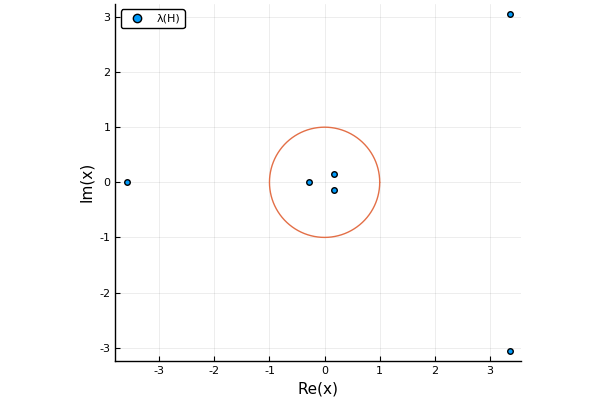

In [8]:
scatter(h,aspect_ratio=1,label="λ(H)")
plot!(exp.(im*2*π*(0:.01:1)),label="")

Now, let's compute the eigenvalues of the closed loop system if LQR state-feedback is used.

In [9]:
using ControlSystems

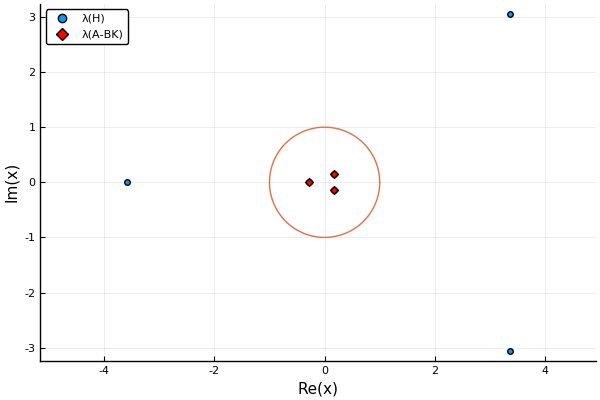

In [10]:
K = dlqr(A,B,Q,R)
hk = eigvals(A-B*K)
scatter!(hk,label="λ(A-BK)",markershape=:diamond,markercolor=:red)

That is it! The closed-loop poles of the system with the LQR state-feedback regulator are exactly in the place of those **stable eigenvalues or their reciprocal values** of the Hamiltonian matrix.  

## References

[1] Lewis, Frank, Draguna Vrabie, and Vassilis L. Syrmos. Optimal Control. 3rd edition. Hoboken: Wiley, 2012.